In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -- 입력과 정답 준비 --
input_data = np.arange(0, np.pi*2, 0.1)  # 입력
correct_data = np.sin(input_data)  # 정답
input_data = (input_data-np.pi)/np.pi  # 입력을 – 1.0 ~ 1.0 범위안으로
n_data = len(correct_data)  # 데이터 수

In [3]:
# -- 각 설정 값 --
n_in = 1  # 입력층의 뉴런 수
n_mid = 3  # 은닉층의 뉴런 수
n_out = 1  # 출력층의 뉴런 수

wb_width = 0.01  # 가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1  # 학습률
epoch = 2001
interval = 200  # 경과 표시간격

In [4]:
class MiddleLayer:
    def __init__(self, n_upper, n):  # 초기설정
        self.w = wb_width * np.random.randn(n_upper, n)  # 가중치(행렬)
        self.b = wb_width * np.random.randn(n)  # 편향(벡터）

    def forward(self, x):  # 순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))  # 시그모이드 함수
    
    def backward(self, grad_y):  # 역전파
        delta = grad_y * (1-self.y)*self.y  # 시그모이드 함수 미분
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 
        
    def update(self, eta):  # 가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [5]:
class OutputLayer:
    def __init__(self, n_upper, n):  # 초기설정
        self.w = wb_width * np.random.randn(n_upper, n)  # 가중치(행렬)
        self.b = wb_width * np.random.randn(n)  # 편향(벡터)
    
    def forward(self, x):  # 순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u  # 항등함수
    
    def backward(self, t):  # 역전파
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T) 

    def update(self, eta):  # 가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b

In [6]:
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

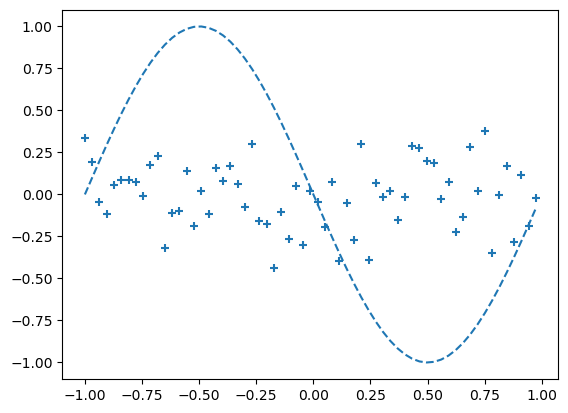

Epoch:0/2001 Error:0.2780157684242222


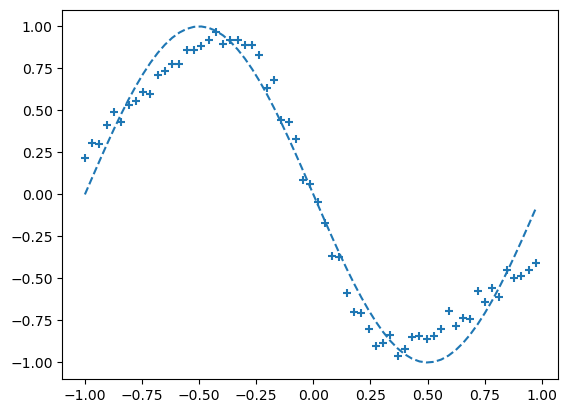

Epoch:200/2001 Error:0.008584660916373043


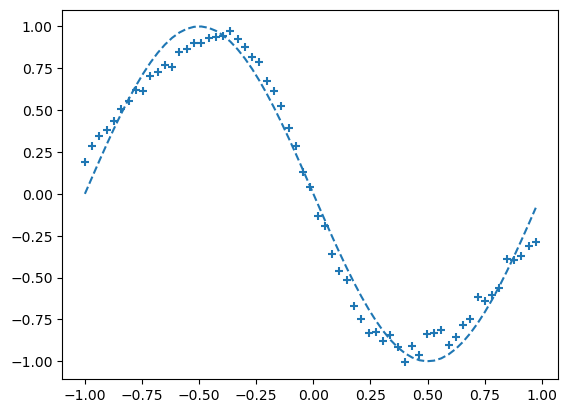

Epoch:400/2001 Error:0.004867947966249961


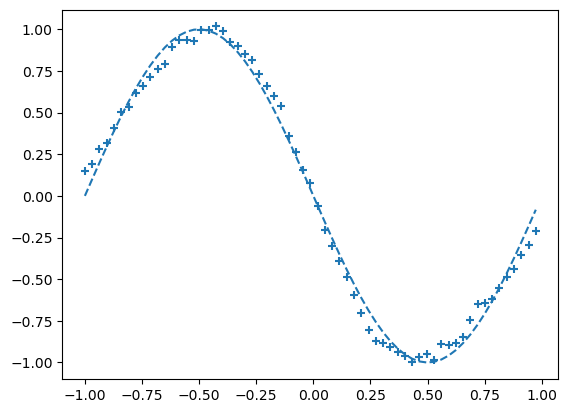

Epoch:600/2001 Error:0.002004409631806591


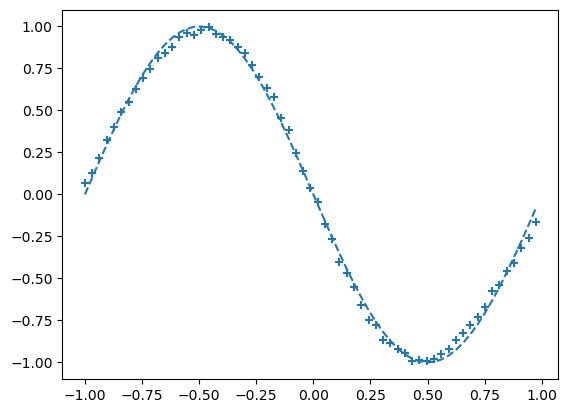

Epoch:800/2001 Error:0.000641161417982637


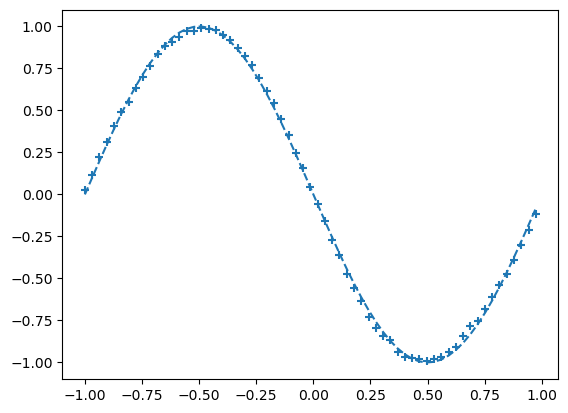

Epoch:1000/2001 Error:0.0001991237092439643


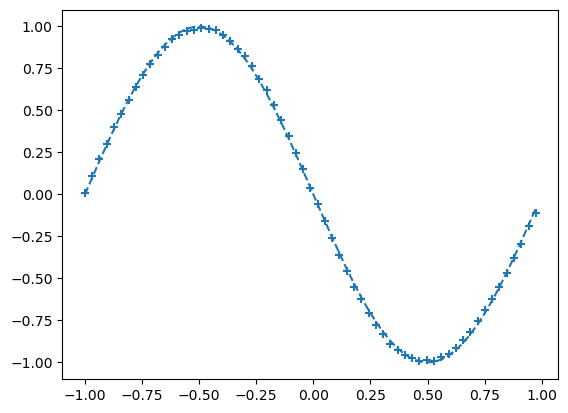

Epoch:1200/2001 Error:7.108320929960487e-05


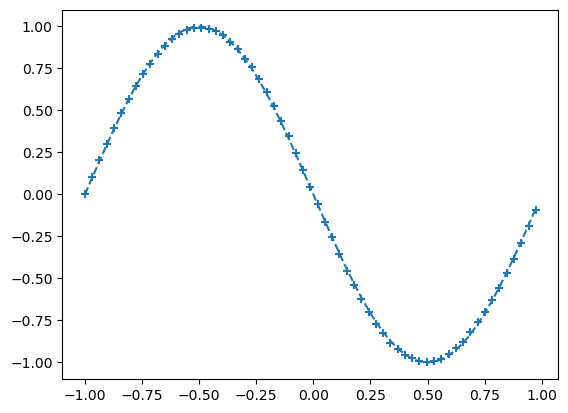

Epoch:1400/2001 Error:2.9660812442771906e-05


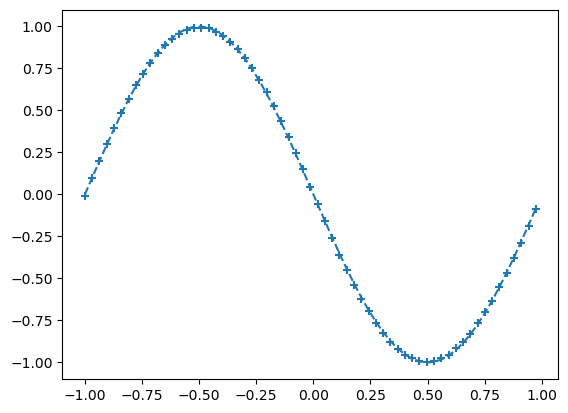

Epoch:1600/2001 Error:1.6555550068481673e-05


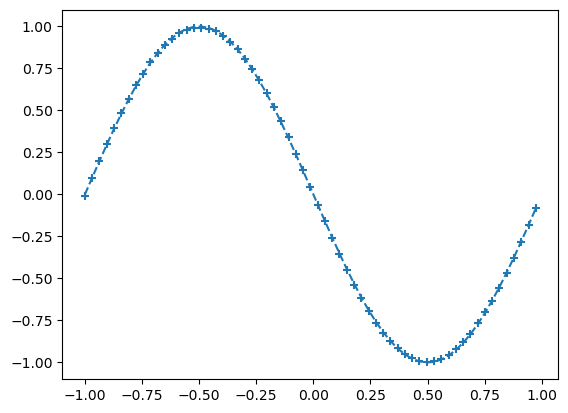

Epoch:1800/2001 Error:1.1321489804825758e-05


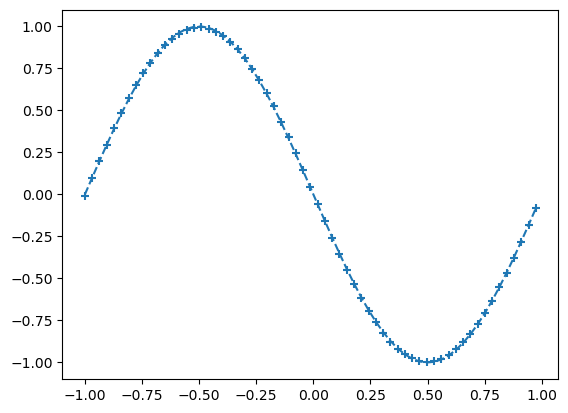

Epoch:2000/2001 Error:8.868331621709128e-06


In [7]:
for i in range(epoch):

    # 인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 결과 표시
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx]  # 입력
        t = correct_data[idx]  # 정답
        
        # 순전파
        middle_layer.forward(x.reshape(1, 1))  # 입력을 행렬로 변환
        output_layer.forward(middle_layer.y)  

        # 역전파
        output_layer.backward(t.reshape(1, 1))  # 정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)  # 행렬을 벡터로 되돌림

            # 오차계산
            total_error += 1.0/2.0*np.sum(np.square(y - t))  # 오차제곱합
            
            # 출력 기록
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 출력 그래프 표시
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # 에포크 수와 오차 표시
        print("Epoch:" + str(i) + "/" + str(epoch), "Error:" + str(total_error/n_data))